<a href="https://colab.research.google.com/github/Sandy9691DS/IrisNB1/blob/main/Naive_Bayes_handsOn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation of Naive Bayes Algorithm

In [3]:
#Use dataset from sklearn
from sklearn.datasets import load_digits

In [4]:
d = load_digits()
d.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
print(d['DESCR']) #8X8 hence 64 Attributes

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
d.data[0] #One image in array form

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [7]:
d.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

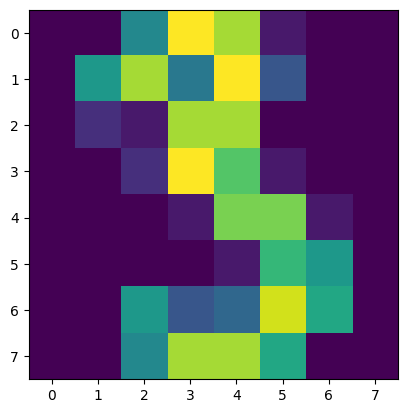

In [8]:
#Display Images
import matplotlib.pyplot as plt

plt.imshow(d.images[3]) #imshow = image show 0X7 & 0X7 = 8X8

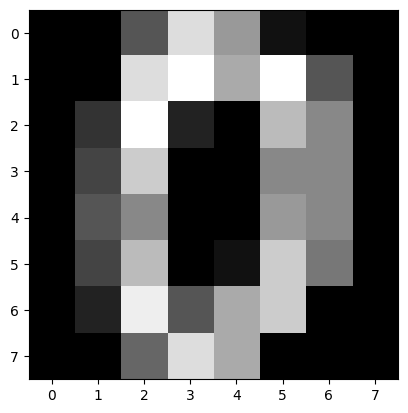

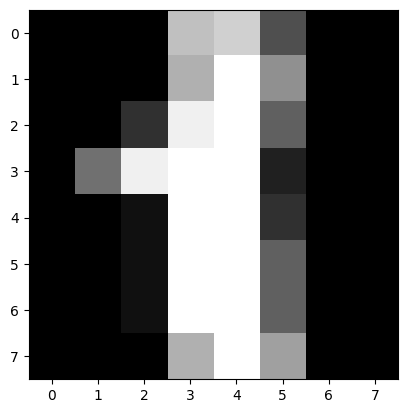

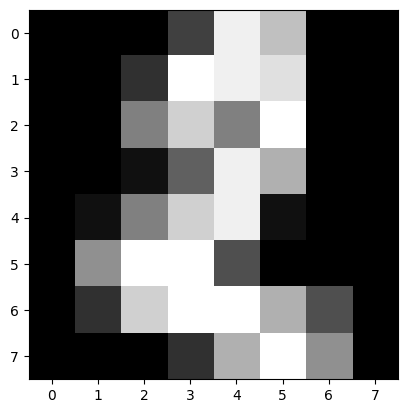

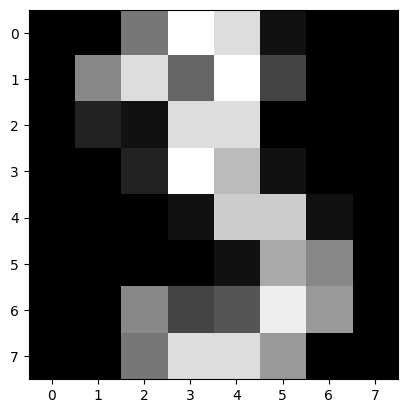

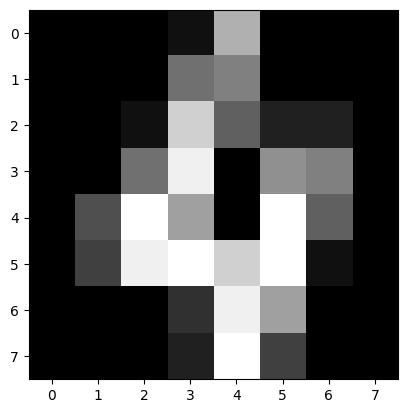

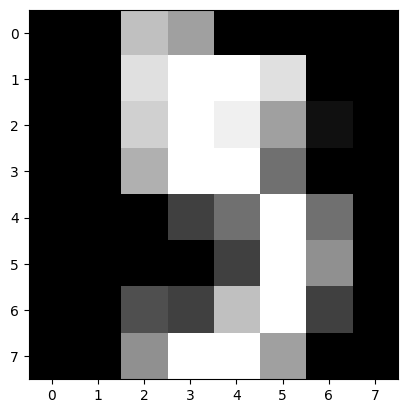

In [9]:
for i in range(6):
  plt.imshow(d.images[i])
  plt.gray()
  plt.show()

In [10]:
#Lets form data
import pandas as pd

df = pd.DataFrame(d.data,columns=d.feature_names) #input
df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [11]:
#Output
d.target

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
#Check unique target
import numpy as np #Its array not series hence import numpy
np.unique(d.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
len(d.target)

1797

In [14]:
df['output'] = d.target
df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,output
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [15]:
#Seperate input and output
#Split data = Train + Test
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns='output')
X[:2]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [17]:
y = df.output
y[:2]

0    0
1    1
Name: output, dtype: int64

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8)

In [19]:
X_train[:2] #Float values 3 type of Navie Bayes

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1068,0.0,0.0,5.0,15.0,14.0,3.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,7.0,13.0,4.0,0.0,0.0,0.0
1339,0.0,0.0,7.0,15.0,16.0,15.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,10.0,12.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.naive_bayes import BernoulliNB

In [21]:
bnb = BernoulliNB() #For binary data
bnb.fit(X_train,y_train)
bnb.score(X_train,y_train)*100

86.43006263048017

In [22]:
from sklearn.naive_bayes import MultinomialNB #Its better than bnb
mnb = MultinomialNB() #Its assumption hence giving better results
mnb.fit(X_train,y_train)
mnb.score(X_train,y_train)*100

90.6750173973556

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() #Continues features
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)*100

85.24704244954768

In [24]:
#From above result we are going to continue with MultinomialNB
#Test phase

y_pred = mnb.predict(X_test)
y_pred[:5] #Predicted result

array([6, 6, 0, 9, 2])

In [25]:
y_test[:5] #Actual result

104     6
1035    6
682     0
405     9
600     2
Name: output, dtype: int64

#Performace metrics

In [26]:
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
cm = confusion_matrix(y_test,y_pred)
cm #row=actual result , column=predicted result

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 27,  1,  0,  0,  0,  0,  0,  2,  2],
       [ 0,  1, 36,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0, 36,  0,  1,  0,  0,  2,  2],
       [ 0,  0,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  1, 10],
       [ 0,  1,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 35,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 34,  2],
       [ 0,  1,  0,  0,  0,  1,  0,  2,  0, 33]])

Text(70.72222222222221, 0.5, 'Actual')

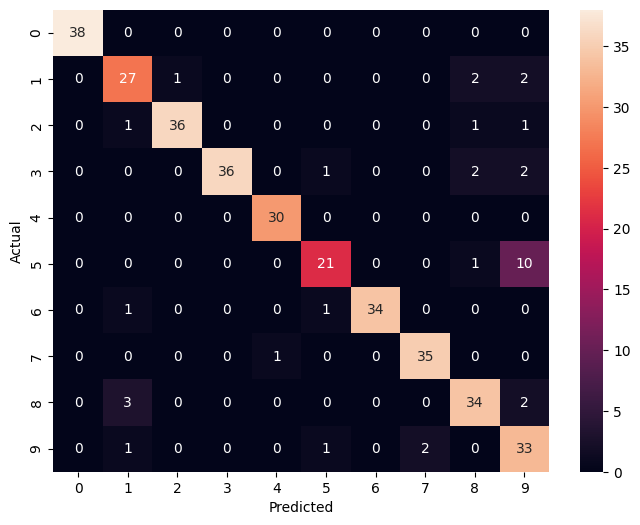

In [28]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [29]:
sum(y_test == 8) #Row wise addition(Actual)

39

In [30]:
sum(y_pred == 8) #Column wise addition(Predicted)

40

In [31]:
len(y_test) #support

360

In [32]:
sum(y_test == 0) #supoort = 29

38

In [33]:
#Classification report
print(classification_report(y_test,y_pred))
#Support = 360 .. dividation of 360

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.82      0.84      0.83        32
           2       0.97      0.92      0.95        39
           3       1.00      0.88      0.94        41
           4       0.97      1.00      0.98        30
           5       0.88      0.66      0.75        32
           6       1.00      0.94      0.97        36
           7       0.95      0.97      0.96        36
           8       0.85      0.87      0.86        39
           9       0.66      0.89      0.76        37

    accuracy                           0.90       360
   macro avg       0.91      0.90      0.90       360
weighted avg       0.91      0.90      0.90       360



In [34]:
#Assignment : Import Iris dataset and apply Naive Bayes

In [35]:
from sklearn.datasets import load_iris

In [36]:
i = load_iris()
df1 = pd.DataFrame(i.data,columns=i.feature_names)

In [37]:
i.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
np.unique(i.target)

array([0, 1, 2])

In [39]:
len(i.target)

150

In [40]:
df1['output'] = i.target
df1.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),output
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [41]:
#Seperate input and output
#Split data = Train + Test
from sklearn.model_selection import train_test_split

In [42]:
X = df1.drop(columns='output')
X[:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [43]:
y = df1.output
y[:2]

0    0
1    0
Name: output, dtype: int64

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8)

In [45]:
bnb = BernoulliNB() #For binary data
bnb.fit(X_train,y_train)
bnb.score(X_train,y_train)*100

34.166666666666664

In [46]:
from sklearn.naive_bayes import MultinomialNB #Its better than bnb
mnb = MultinomialNB() #Its assumption hence giving better results
mnb.fit(X_train,y_train)
mnb.score(X_train,y_train)*100

96.66666666666667

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() #Continues features
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)*100

95.83333333333334

In [48]:
#From above result we are going to continue with MultinomialNB
#Test phase

y_pred = gnb.predict(X_test)
y_pred[:5] #Predicted result

array([0, 2, 1, 1, 1])

In [49]:
y_test[:5]

46     0
127    2
67     1
50     1
133    2
Name: output, dtype: int64

In [50]:
#Performance report

from sklearn.metrics import confusion_matrix,classification_report

In [51]:
cm1 = confusion_matrix(y_test,y_pred)
cm1

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]])

Text(70.72222222222221, 0.5, 'Actual')

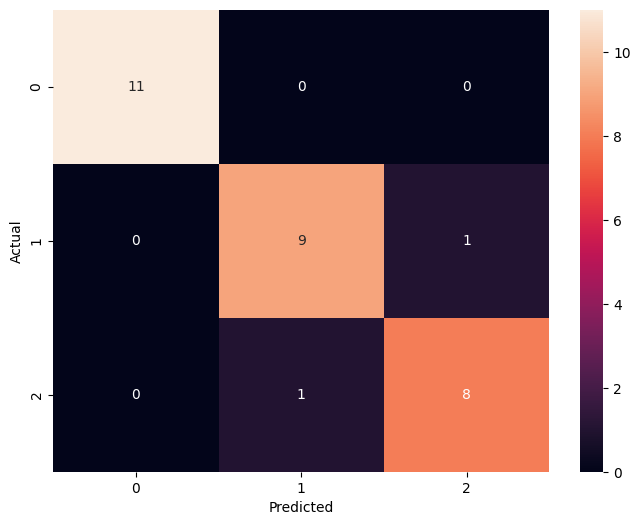

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(cm1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [53]:
sum(y_test == 1) #Row wise addition(Actual)

10

In [54]:
sum(y_pred == 2) #Column wise addition(Predicted)

9

In [55]:
#Classification report
print(classification_report(y_test,y_pred))
#Support = 30 .. dividation of 30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [56]:
sum(y_test == 0) #supoort = 30

11